02 2クラス分類における基準
======================

* `2クラス分類`は、実用上おそらく最も一般的で、概念的には単純な機械学習アプリケーションである

* しかし、このような簡単なタスクでも、評価には様々な注意点がある

* 別の基準を見る前に、精度ではうまくいかない場合を見てみる

* 2クラス分類の場合には、2つのクラスを`陽性クラス`と`陰性クラス`と呼び、探しているものを`陽性`と呼ぶ

## 1. エラーの種類

* 精度が予測性能の尺度として良くない場合がしばしばある

    * 間違えた回数には、我々が興味を持つような情報が全ては含まれていないため
    
    * 自動テストで癌の早期発見のスクリーニングをするアプリケーションを考えてみる
    
    * テストが陰性であれば患者は健康であ理、陽性であればさらなる検査に回される
    
    * ここで、テストが陽性の場合(癌であるらしい場合)を`陽性クラス`、陰性の場合を`陰性クラス`と呼ぶ
    
    * モデルは完璧に機能するわけではないが、間違いは必ず起こる
    
    * どのようなアプリケーションであっても、間違いの結果が実世界でどのような影響を及ぼすかを考えなくてはならない

* 1つの間違い方は、健康な患者を陽性に分類してしまうこと

    * この場合患者は余分な検査を受けることになる
    
    * この結果、費用と面倒(心理的ストレス)が患者にかかることになる
    
    * このような間違った陽性との判断を**偽陽性**と呼ぶ
   

* もう1つの間違い方は、病気の患者を陰性と分類してしまうこと

    * この場合、患者は必要な検査や治療が受けられなくなる
    
    * 診断されなかった癌は深刻な健康問題を引き起こし、場合によっては死に至る可能性がある
    
    * このような種類の、誤った陰性との分類を**偽陰性**と呼ぶ

* 統計学では、**偽陽性**を`タイプⅠエラー`、**偽陰性**を`タイプⅡエラー`と呼ぶ

    * 癌の診断の例では、**偽陰性**を可能な限り避けるべきである

* これはやや極端な例だが、偽陽性と偽陰性が同じ重みであることはほとんどない

    * ビジネスアプリケーションでは、双方のエラーに値段をつけても良い
    
    * そうすれば、精度の代わりに損失額で評価できる
    
    * このようにすると、どのモデルを使うかをよりビジネス的に判断することができる

## 2. 偏ったデータセット

* エラーのタイプは、2つのクラスの一方がもう一方よりもずっと多い場合に重要になる

    * 実際にはこのような場合は多い
    
    * 良い例がクリックスルーの場合
    
    * 個々のデータポイントは、ユーザに提示されたアイテムの「インプレッション」を表す
    
    * ここでいうアイテムは、広告かもしれないし、関連したページかもしれないし、関連するSNSユーザのフォローかもしれない
    
* 目的は、あるアイテムをユーザに提示した場合に、ユーザがそれをクリックする(つまり興味を持つ)かどうかを予測すること

    * ユーザはインターネット上に提示されたもののほとんどをクリックしない(特に広告)
    
    * この場合、100本に1本見てくれれば良いので、サンプルの99%が「クリックされない」クラスになってしまう
    
    * このように一方のクラスが他方のクラスよりもずっと多いようなデータセットを**偏ったデータセット**と呼ぶ
    
        * 実際には、偏ったデータがほとんどで、頻度が同じだったり近かったりするようなデータは珍しい

* クリック予測で99%の精度を達成するクラス分類器ができたとする

    * これは、99%の精度が素晴らしく思えたら、クラスの偏りを考えに入れていないため
    
    * これは機械学習モデルを構築しなくても、常に「クリックされない」と予測するだけで達成できる
    
    * 問題は、精度という基準では、常に「クリックされない」と返すモデルと、潜在的には良いモデルを区別できないということ

* この問題をはっきりさせるために、9:1に偏ったデータセットを作る
    
    * digitsデータセットの数字9を9以外の数字と分割する問題にする

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

* `DummyClassifier`を、常に多数のクラス(ここでは「9以外」)を予測するようにして、精度が役に立たないことを確かめてみる

In [2]:
import numpy as np
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


* 何も学習しなくても90%の精度が得られた

     * 一方を常に予測しているだけで90%が達成できてしまう問題もある
        
     * 実際のクラス分類器と比較してみる

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


* 精度でいうと、`DecisionTreeClassifier`は常に同じ答えを返す予測器よりも少し良い

    * これが意味するのは、`DecisionTreeClassifier`の使い方を何か間違えたか、精度が良い基準でないのか、どちらか

* 比較のために、あと2つクラス分類器を評価してみる
    
    * `LogisticRegression`と、デフォルトの`DummyClassifier`
    
    * デフォルトの`DummyClassifier`は、ランダムに予測を行うが、訓練セットと同じ比率で予測クラスを生成する

In [4]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.83
logreg score: 0.98


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* ランダムな出力を行うダミークラス分類器のスコアが明らかに一番悪く(精度の観点)、`LogisticRegression`のスコアは良い

    * しかし、ランダムな分類器ですら80%の精度を達成している(何を参考にすれば良いのかが、分からなくなる)
    
    * ここでの問題は、偏ったデータに対する予測性能を定量化する基準として、精度は不適切
    
    * 本章のここ以降では、モデルの選択に役に立つ他の基準を見ていく
    
* 特に、機械学習のモデルが、「頻度が高いものを返す」だけのクラス分類器`pred_most_frequent`や、ランダムなクラス分類器`pred_dummy`よりどの程度良いのかを示す基準が欲しい

    * モデルを評価する基準は、これらの無意味な予測を排除できるものでなければならない

## 3.混同行列

* 2クラス分類の評価結果を表現する方法で、最も包括的な方法の1つとして`混同行列`がある

    * 前に見た`LogisticRegression`の結果を`confusion_matrix`関数で見てみる
    
    * テストセットに対する結果は、`pred_logreg`に格納されている

In [5]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[401   2]
 [  8  39]]


* `confusion_matrix`の出力は$2 \times 2$の配列である

    * 行は特定のクラスに対応し、列は予測されたクラスに対応する
    
    * 個々の要素は、行に対応するクラス(「9以外」か「9」)が、列に対応するクラスに分類された回数を示す

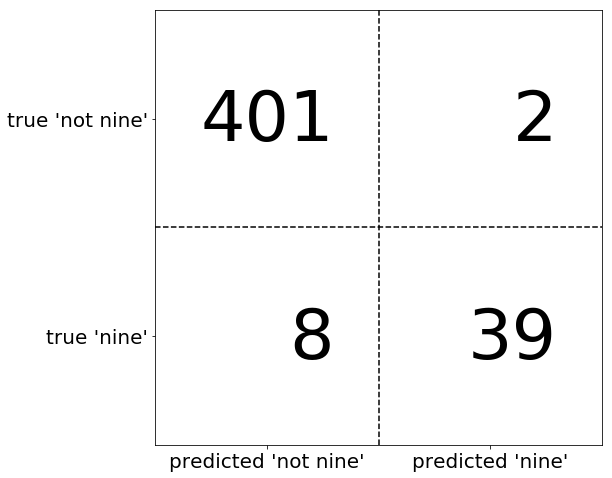

In [6]:
%matplotlib inline
import mglearn
mglearn.plots.plot_confusion_matrix_illustration()

* `混同行列`の主対角成分の要素は、正確にクラス分類されたサンプルの個数を示し、それ以外の要素は、実際とは違うクラスに分類されたサンプルの個数を表す

* 「9」を陽性クラスとすると、`混同行列`のエントリを先ほど導入した`偽陽性`と`偽陰性`に結びつけることができる

    * 全てのエントリを埋めるために、陽性クラスで正しく分類されたサンプルを`真陽性`、陰性クラスで正しく分類されたサンプルを`真陰性`と呼ぶ
    
    * これらの用語は、`FP`、`FN`、`TP`、`TN`と省略する

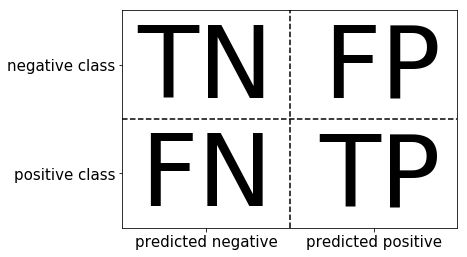

In [7]:
mglearn.plots.plot_binary_confusion_matrix()

* この`混同行列`を使って、先ほど学習したモデル(2つのダミーモデル、決定木、ロジスティック回帰)を比較してみる

In [8]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[358  45]
 [ 41   6]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[401   2]
 [  8  39]]


* 混同行列を見ると、`pred_most_frequent`は常に1つのクラスを予想しているので、何がおかしいことはすぐにわかる

* `pred_dummy`は、`真陽性`が非常に少ないのが目に付く
    
    * これは`偽陽性`と`偽陰性`と比べると明らか
    
    * `偽陽性`の方が`真陽性`よりも多い
    
    * 決定木の精度はダミーとあまり変わらなかったが、混同行列を見るとはるかにまともである
    
* 最後のロジスティック回帰は、決定木の`pred_tree`よりも全ての面で良いことがわかる

    * `真陽性`、`真偽値`の数はより多く、`偽陽性`、`偽陰性`の数は少ない
    
    * この比較から、決定木とロジスティック回帰だけがまともな結果を返しており、その中でも、ロジスティック回帰の方が決定木より全ての面で良い
    
* このような混同行列を見ることは面倒なので、以下で混同行列の情報をみる方法を説明する

### 精度との関係

* 精度は以下のように計算できる

\begin{equation}
  精度 = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

* つまり、精度は正確な予測(TPとTN)を全てのサンプルの個数(混合行列の全てのエントリを足した数)で割ったもの

### 適合率

* `適合率`：陽性であると予測されたものがどのくらい実際に陽性であったかを測定する

\begin{equation}
適合率 = \frac{TP}{TP + FP}
\end{equation}

* 適合率は、偽陽性の数を制限したいときに、性能基準として用いられる

* 例)新薬が臨床試験の結果有効であるかどうかを予測するモデルを考える

    * 臨床試験は高価なので、偽善性をあまり起こさないモデル(適合度の高いモデル)を選ぶことが重要
    
    * 適合率は`PPV`(陽性的中率)とも呼ばれる

### 再現率

* `再現率`：実際に陽性のサンプルのうち、陽性と予測されたものの割合と定義される

\begin{equation}
再現率 = \frac{TP}{TP + FN}
\end{equation}

* 再現率は、全ての陽性サンプルを陽性だと判断する必要がある場合(つまり偽善性を避けることが重要な場合)に用いる

    * 癌である人を全て見つけることが重要で、健康な人が癌であると予測されても構わない
    
    * 再現率は`感度`、`ヒット率`、`真陽性率`(TPR)とも呼ばれる
    
* 再現率の最適化と適合率の最適化はトレードオフの関係にある

    * 全てのサンプルを陽性クラスと判定するようにすれば、簡単に再現率100%を達成することができる(偽陰性も真陰性もなくなるため)
    
    * しかし、全てのサンプルを陽性クラスと判定すると、大量の偽陽性が発生し、適合率は非常に低くなる
    
    * 一方で、真であることが最も確信できるデータポイント1点についてだけ陽性と予測し、残りを陰性と予測するようなモデルを作ると適合率が100%となるが、再現率は非常に低くなる

### f-スコア

* 適合率と再現率は非常に重要な基準であるが、これらの一方だけでは、全体像が掴めない

    * これら2つをまとめる方法の1つが、`f-スコア`(`f-値`)
    
    * これは、適合率と再現率の調和平均である
    
\begin{equation}
F = 2 \times \frac{適合率 \times 再現率}{適合率 + 再現率 }
\end{equation}

* これは`f-値`の変種の1つであり、$f_1$-値とも呼ばれる

* この値は`適合率`と`再現率`の双方を取り入れているので、偏った2クラス分類データセットに対して、精度よりも良い基準となる

    * この基準を、「9」vs「9以外」データセットに対する予測結果に適用してみる
    
    * ここでは「9」を陽性クラスとしているので、陽性クラスの方が少ない

In [9]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1 score most frequent: 0.00
f1 score dummy: 0.12
f1 score tree: 0.55
f1 score logistic regression: 0.89


/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


* ここで注意すべきことは2つある

    * 1つは、`most_frequent`(最も多いクラスを選んだ場合)の予測に対してエラーが発生すること
    
        * これは陽性クラスと予測されるサンプルがないため(f-値の分母が0になる)
    
    * もう1つは、ダミー2つと決定木による予測が峻別できているということ
    
        * 精度だけでは、これらは明らかにならなかった
        
* f-値を使うと、予測性能を再び1つの値として扱うことができる

    * f-値によるモデル評価結果は、精度による結果よりも我々の直感に近い
    
    * f-値の問題点は、精度と比較すると、解釈や説明が難しいこと

* `適合率`、`再現率`、`f-値`をまとめた包括的なレポートを得るには、便利な`classification_report`関数を用いる

    * この関数にはこの3つの基準を同時に計算し、綺麗に表示してくれる

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

   micro avg       0.90      0.90      0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/MacUser/anaconda2/envs/tf140/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* `classification_report`関数は、クラス(この場合は真と偽)ごとに、そのクラスを陽性とした場合の適合率と再現率とf-値を1行に出力する

    * 以前に示したものは、少数派の「9」をあらかじめ陽性としていた
    
    * 陽性クラスを「9以外」とすると、`classification_report`の出力によると、`most_frequent`でもf-値が0.94になる
    
    * さらに、全てを「9以外」に分類するので、再現率は1となる
    
* f-値の隣の最後の列には、個々のクラスの**支持度**が出力される

    * これは、そのクラスの実際のサンプルの個数
    
* クラス分類レポートの最後の行は、(各クラスのサンプルの個数で)重み付けした平均値

    * ダミークラス分類器とロジスティック回帰のレポートを見てみる

In [11]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      0.89      0.89       403
        nine       0.12      0.13      0.12        47

   micro avg       0.81      0.81      0.81       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.82      0.81      0.81       450



In [12]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.98      1.00      0.99       403
        nine       0.95      0.83      0.89        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



* レポートから明らかなように、ダミーのモデルと非常に良いモデルの違いは明らかではなくなっている

    * どちらのクラスを陽性とするかによって、値が大きく変わってしまう
    
    * 「9」の方を陽性とした場合には、ダミークラス分類器のf-値は0.10だが(ロジスティック回帰では0.89)
    
    * 「9以外」を陽性とすると、0.91対0.99となってしまい、双方ともかなり良いように見えてしまう
    
    * しかし、全ての値を合わせてみると、かなり正確な様子が掴め、ロジスティック回帰の優位性が明らかになる

## 4.不確実性を考慮に入れる

* 混同行列とクラス分類レポートは、特定の予測に対して詳細な解析を与えてくれる

    * しかし、予測クラスとなった時点で、モデルに含まれている情報の相当量が失われている
    
    * ほとんどのクラス分類器には、予測の不確実性を評価するための`decision_function`メソッドもしくは`predict_proba`メソッドが用意されている
    
    * 予測を行うということは、`decision_function`や`predict_proba`の出力を固定したスレッショルドで分けることに相当する
    
    * スレッショルドは、`decision_function`の場合は0、 `predict_proba`の場合は0.5

* 以下の例では、400点が陰性クラスで、50点が陽性クラスになる、偏った分類タスク

    * 訓練データの右の図は、決定関数をヒートマップとしてプロットしたもの
    
    * プロット中の中央上にある黒い円は、`decision_function`の値がちょうど0になる場所
    
    * この円の内側は陽性となり、外側は陰性と分類される

In [13]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

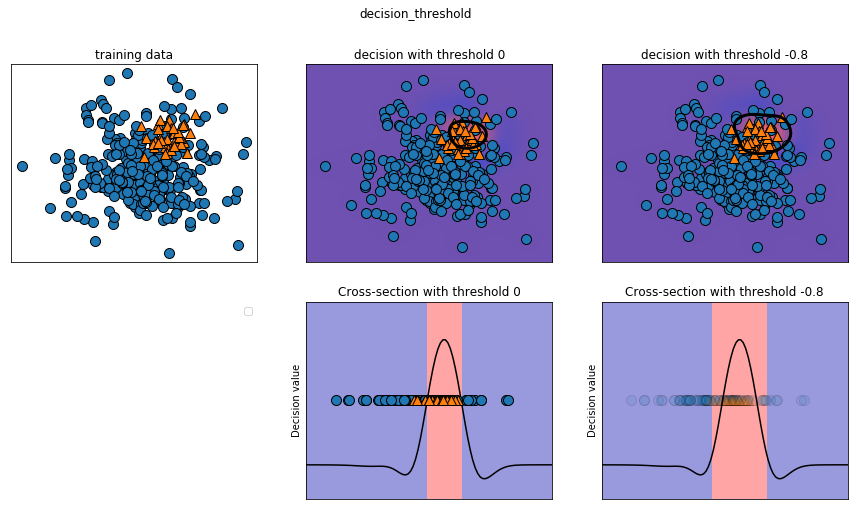

In [14]:
mglearn.plots.plot_decision_threshold()

* `classification_report`関数を用いて、それぞれのクラスの適合率と再現率を見てみる

In [15]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

   micro avg       0.88      0.88      0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



* クラス1に関しては、再現率は低く、適合率も微妙である

* クラス0がはるかに多いので、クラス分類器はクラス0を正しく分類することに集中してしまい、少ないクラス1の識別がうまく行かない

* あるアプリケーションにおいて、クラス1の再現率を高めることが重要であると考えてみる

    * 先に述べた癌のスクリーニングの例がこれに当たる
    
    * このような場合は、`偽陽性`(間違ってクラス1と判定すること)が増えても構わないので、より多くの`真陽性`を得たい(再現率が高くなる)
    
    * `svc.predict`で生成される予測はこの要求を満たしていないが、決定スレッショルドを0から動かすことで、クラス1の再現率が高くなるように予測を調整することができる
    
    * デフォルトでは、`decision_function`の値が0以上であればクラス1に分類される
    
    * ここでは、より多くのデータポイントがクラス1に分類されるようにしたいので、スレッショルドを小さくする

In [16]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [17]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

   micro avg       0.83      0.83      0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



* 予想通りであるが、クラス1の再現率は向上し、適合率は下がった

* 図の右上のパネルに示したように、より多くの領域をクラス1と分類するようになった

    * `適合率`と`再現率`のどちらか一方を重視したい場合、もしくはデータが大幅に偏っている場合、一番簡単に良い結果を得るには決定スレッショルドを見つけること
    * ただし、`decision_function`の結果は範囲が決まっていないので、良いスレッショルドを見つける簡単なルールはない

* `predict_proba`メソッドを実装しているモデルであれば、スレッショルドを設定するのは比較的簡単である
    
    * `predict_proba`の出力は0から1の範囲に固定されていて、確率を表しているため
    
    * デフォルトではスレッショルドは0.5になっている
    
    * つまり、モデルが50%以上「確か」だと判断すれば、その点は陽性クラスに分類される
    
    * スレッショルドを大きくすると、陽性に分類するには、より「確信」していなければなくなる(その値よりも確信度が低ければ陰性と判断される)
    
    * 任意の幅に対してスレッショルドを設定するよりも、確率値をいじる方が直感的ではあるが、全てのモデルが現実的な確信度モデルを持つわけではない
    
        * 深さ制限を付けずに訓練した`DecisionTree`は、間違っていることがあるのにも関わらず、常に100%確実だと判断する
        
    * ここで出てくるのが`較正`である
    
        * 較正されたモデルは、確信度に対して正確な基準を提供する
        

### 5.適合率-再現率カーブとROCカーブ

* モデルがクラス分類の判断を行うスレッショルドを変更することで、クラス分類器の適合率と再現率のトレードオフを調整することができる

* 陽性のサンプルを見落とす割合を10%に抑えたい場合を考えてみる

    * これは再現率が90%であることを意味する
    
    * このような判断は、アプリケーションに依存し、ビジネスゴールによって決定されるべきである
    
    * あるゴールが設定されたら(あるクラスに対して特定の再現率や適合率が決められたら)、それに応じてスレッショルドを決めることができる
    
        * 例)再現率90%のような特定のターゲットを満たすスレッショルドを設定することは常に可能
        
        * 難しいのは、このようなスレッショルドでも適切な適合率を保てるようなモデルを開発すること
        
        * 全ての陽性だと判断すれば、再現率を100%になるが、そんなモデルには意味がない

* 再現率90%のように、クラス分類器に要請を設定することを、`作動ポイント`の設定と呼ぶ

    * 作動ポイントを固定することは、ビジネス環境においては性能を顧客や組織内の他のグループに対して保証することになる

* 新しいモデルを開発する際には、どこが作動ポイントになるかは、完全には明らかではない

    * 従って、モデルの問題をより良く理解するために、全ての可能なスレッショルド(全ての可能な適合率と組み合わせ)を同時にみることが役に立つ
    
    * これには、`適合率-再現率カーブ`と呼ばれるものを使う
    
    * `sklearn.metrics`モジュールに、`適合率-再現率カーブ`を計算する関数`precision_recall_curve`がある
    
    * この関数は、実際のラベル情報と、`decision_function`か`predict_proba`で予測された不確実性を必要とする

In [18]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

* `precision_recall_curve`関数は、全ての可能なスレッショルドに対する適合率と再現率の値のリストをソートして返すので、プロットすることができる

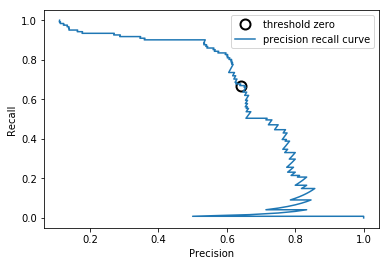

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
# カーブが滑らかになるようにデータポイントを増やす
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# ゼロに最も近いスレッショルドを探す
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

* 上の図のカーブ上の個々の点は、`decision_function`の様々なスレッショルド値に対応する

    * 例)再現率0.4を適合率0.75の点で達成することができる
    
    * 黒い円は、`decision_function`のデフォルトであるスレッショルドが0の点を指している
    
    * この点は、`predict`メソッドを呼び出したときに用いられるトレードオフの点である

* カーブが右上の角に近ければ近いほど、良いクラス分類器であるということになる

    * つまり、あるスレッショルドに対して、適合率が高く、同時に再現率も高いということ
    
* カーブは左上の角から始まる
    
    * この点は、スレッショルドが非常に低い場合に対応し、全てを陽性クラスと判断する
    
* スレッショルドを大きくするにつれて、カーブは適合率を高くする方向に行くが、再現率は低くなる
    
    * スレッショルドをさらに大きくすると、陽性と判断された点のほとんどが実際に陽性であるという状況になる
    
    * つまり、適合率は高く、再現率は低い状態
    
    * 適合率が高くなっても、再現率が落ちないモデルが良いモデル

* このカーブをもう少し良く見てみる

    * このモデルでは、再現率を非常に高く保ったまま適合率0.5までは達成できることがわかる
    
    * これ以上適合率を上げようとすると、再現率を大幅に犠牲にしなければならない
    
    * 言い換えると、カーブの左側は平らで、適合率を高くしても、再現率はそれほど大きくは下がらない
    
    * 適合率が0.5より大きい領域では、適合率を少し上げると再現率が大きく低下する

* 得意とするカーブの部分(作動ポイント)は、クラス分類器によって異なる

    * 同じデータセットに対して訓練したSVMとランダムフォレストを比較してみる
    
    * `RandomForestClassifier`には`decision_function`はなく、`predict_proba`しかない
    
    * `precision_recall_curve`関数の第2引数は、陽性クラス(クラス1)の確信度尺度なので、サンプルがクラス1になる確率を渡せば良い
    
    * つまり、`rf.predict_proba(X_test)[:, 1]`とする
    
    * デフォルトの`predict_proba`に対するスレッショルドは0.5である
    
    

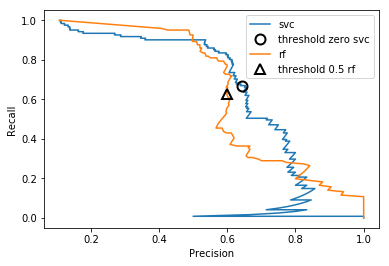

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifierにはpredict_probaはあるがdecision_functionがない
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

* 適合率-再現率カーブを比較してみると、非常に高い再現率や非常に高い適合率が要求される場合には、ランダムフォレストの性能が良い

* その中間(再現率が0.7のあたり)では、SVMの方が性能が良い

* $f_1$値だけを見て全体の性能を比較していたのでは、このような微妙な部分を見過ごしてしまう

    * $f_1$値はデフォルトのスレッショルドで与えられる一点を表しているに過ぎないため

In [21]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


* 2つの適合率-再現率カーブを比較すると様々なことがわかるが、それには人間が目で見る必要がある
    
    * 自動的にモデルを比較するには、このカーブに含まれている情報を、特定のスレッショルドもしくは作動ポイントに依らずまとめる方法が必要
    
    * 適合率-再現率カーブを要約する方法の1つが、カーブの下の領域を積分する方法
    
        * これは、`平均適合率`とも呼ばれる
    
    * `average_precision_score`関数を用いて適合率を計算することができる
    
    * 適合率-再現率カーブを計算して複数のスレッショルドを考えなければならないので、`average_precision_score`には、`predict`の結果ではなく、
    
    * `decision_function`もしくは`predict_proba`の結果を渡す必要がある

In [22]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


* 全ての可能なスレッショルドに対して平均を取ると、ランダムフォレストとSVCの結果はだいたい同じだが、ランダムフォレストの方が少しだけ良いという結果になる

    * これは、上で`f1_score`で得た結果とは大きく異なる
    
    * 平均適合率は、0から1までのカーブの下の領域なので、平均適合率の値は0(最悪値)から1(最良値)までとなる
    
    * `decision_function`にランダムな値を返すクラス分類器では、平均適合率の値はデータセット中の陽性サンプルの割合と同じになる

### 6.受信者動作特性(ROC)とAUC


* `受信者動作特性カーブ`(ROCカーブ)：適合率-再現率カーブと同様に、与えられたクラス分類器の全てのスレッショルドを考慮する

    * 適合率と再現率の代わりに、`偽陽性率`(FPR)と`真陽性率`(TPR)に対してプロットする
    
    * `真陽性率`は再現率の別名だが、`偽陽性率`は全ての陰性サンプルの個数に対する偽陽性数の割合
    
\begin{eqnarray}
FPR = \frac{FP}{FP + TN}
\end{eqnarray}

* `ROCカーブ`は、`roc_curve`で計算することができる

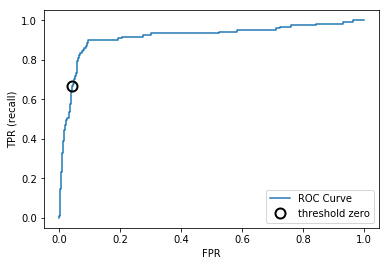

In [23]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# 0に最も近いスレッショルドを見つける
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

* ROCカーブについては、理想的な点は左上に近い点

    * つまり、**低い偽陽性率**を保ちながら**高い再現率**を達成するのが理想
    
    * このカーブから、デフォルトのスレッショルド0を比較すると、FPRを増やすだけで、はるかに高い再現率(約0.9)を達成できる
    
    * 左上に近い点が、デフォルトで選ばれた点よりも良い作動ポイント
    
    * ただし、スレッショルドを選択する際にテストセットとを使ってはいけない(別の検証セットを使うことを忘れない)

* ランダムフォレストとSVMをROCカーブで比較したものを以下の図に示す

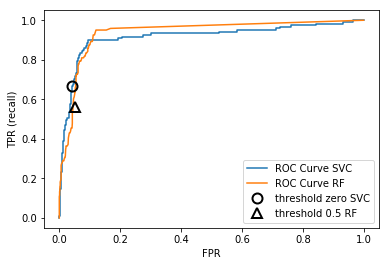

In [24]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

* 適合率-再現率カーブの場合と同様に、カーブの下の領域面積を用いて、ROCカーブを1つの値にまとめることができる

    * カーブの下の領域を略して、`AUC`と呼ぶ
    
    * この場合のカーブはROCカーブ
    
* ROCカーブの下の領域を`roc_auc_score`関数で計算することができる

In [25]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


* ランダムフォレストとSVMをAUCスコアで比較すると、ランダムフォレストの方がSVMよりも少しだけ良いことがわかる

    * ROCは0から1までのカーブの下の領域なので、AUCスコアは常に0(最悪値)から1(最良値)の間になる
    
* ランダムに予測するようなクラス分類器に対しては、どんなにクラスが偏ったデータセットであっても、AUCは常に0.5になる

    * したがって、偏ったクラス分類問題を評価する際の基準としては、精度よりもAUCの方がはるかに良い
    
    * AUCは陽性のサンプルの**ランキング**を評価していると解釈することもできる
    
    * AUCは、ランダムに選んだ陽性クラスサンプルのそのクラス分類器でのスコアが、ランダムに選んだ陰性クラスサンプルのスコアよりも高くなる確率と同じ
    
    * 完全なクラス分類器のAUCは1となる
    
        * これは、全ての陽性サンプルのスコアが全ての陰性サンプルのスコアよりも高くなることを意味する
        
    * 偏ったクラスのクラス分類問題では、精度ではなくAUCをモデル選択に用いた方がはるかに良い結果が得られる

* digitsデータセットの「9」と「9以外」をクラス分類する問題

    * SVMのカーネルバンド幅`gamma`を3種類に設定してデータセットを分類する

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


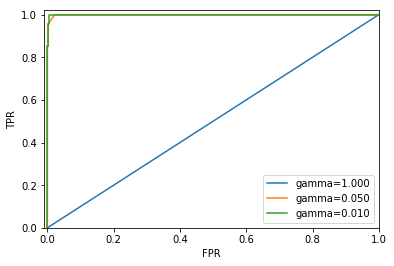

In [26]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

* どの`gamma`に対しても、精度は同じで90%である

    * これは偶然の一致で得られてしまう結果の性能かもしれないし、そうでないかもしれない
    
    * しかし、AUCと対応するカーブを見ると、3つのモデルの違いがはっきりわかる
    
* `gamma=1.0`の場合は、AUCが実際にチャンスレベルになっており、`decision_function`の出力はランダムなものと変わらない

* `gamma=0.05`ではAUCが大きく改善し0.9となる

* 最後に`gamma=0.01`とすると、完全なAUC1.0が得られる

    * これは、全ての陽性データポイントが全ての陰性データポイントよりも、決定関数で良いスコアを得ている
    
    * つまり、適切にスレッショルドを設定すれば、このモデルはデータを完璧に分類できる
    
* これがわかれば、このモデルのスレッショルドを調整して、素晴らしい予測をすることができる

    * 精度だけを使っていたのでは、このようなことはわからない

* したがって、偏ったデータセットを評価する際には、AUCを用いることを強く勧める

    * ただし、AUCはデフォルトのスレッショルドを用いない
    
    * AUCが高いモデルを用いて有用なクラス分類を行うには、スレッショルドを調整する必要がある可能性がある

|  版  |   年/月/日   |
|-----|-----------------|
|初版|2019/03/30|